In [ ]:
#Основные библиотеки
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

**Подготовка/Очитска данных**

In [ ]:
#Датасет для работы (http://archive.ics.uci.edu/ml/datasets/online+retail), 
'''Аннотация: Это транснациональный набор данных, который содержит все транзакции, 
произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании и зарегистрированной онлайн-розничной торговли'''
#Атрибуты датасета
'''InvoiceNo: Номер счета-фактуры. Номинальный. 6-значный интегральный номер, однозначно присваиваемый каждой транзакции. Если этот код начинается с буквы "c", это указывает на отмену.
StockCode: Код товара (номенклатуры). Номинальный. 5-значный интегральный номер, однозначно присваиваемый каждому отдельному продукту.
Description: Название продукта (товара).Номинальный.
Quantity:  количество каждого продукта (позиции) за транзакцию. Числовой.
InvoiceDate: Дата и время выставления счета. Числовой. День и время, когда была сгенерирована транзакция.
UnitPrice: Цена за единицу. Числовой. Цена продукта за единицу в фунтах стерлингов .
CustomerID: номер клиента. Номинальный. 5-значный интегральный номер, однозначно присваиваемый каждому клиенту.
Country: Название страны. Номинальный. Название страны, в которой проживает клиент.'''

In [ ]:
#загружаем данные из файла
df = pd.read_excel("Online Retail.xlsx")
df.head(6)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#Датасет изобилует строками с пропущенными пустыми id клиентов, удалим их
df.drop(index=df[df.CustomerID.isna()].index,inplace=True)
df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
#также стоит избавиться в анализе от данных об отменённых заказах, помеченных как 'c'
df.drop(index=df[df.InvoiceNo.str.contains('C') == True].index,inplace=True)
df.reset_index(drop=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
#под очистку подпадают записи со значением M в StockCode, по скольку не наличиствует информации о товаре.
df.drop(index=df[df.StockCode == 'M'].index,inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
#В некоторых счетах указана цена за единицу с нулевыми значениями. Я заполняю эти нулевые значения на основе элемента, ранее описанного
def applyUnitPrice(x):
    if x['UnitPrice'] == 0 :
        return df[df['Description'] == x['Description']]['UnitPrice'].values[1]
    else :
        return x['UnitPrice']
df['UnitPrice'] = df.apply(applyUnitPrice,axis=1)
df['CustomerID'] = df.CustomerID.astype(int)
df.to_csv('OnlineRetail_Clean.csv')

**Расчёт показателей Recency, Frequency & Monetary**

In [ ]:
df = pd.read_csv('OnlineRetail_Clean.csv')
df.drop(['Unnamed: 0'],inplace=True,axis=1)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
from datetime import timedelta

#расчёт monetary
df['TotalSum'] = df['Quantity'] * df['UnitPrice']

#расчёт recency. Дата последнего заказа из файла выборки 
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

#расчёт frequency. Разница между последним заказом в данных и последним заказом клиента
rfm = df.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalSum': 'sum'})

# переименуем столбцы
rfm.rename(columns={'InvoiceDate': 'Recency','InvoiceNo': 'Frequency','TotalSum': 'Monetary'}, inplace=True)
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,12,178.05


**Кластеризация данных**

In [ ]:
#загружаем библиотеки и методы, реализующие методы кластеризации и нормализации значений
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler,StandardScaler

In [ ]:
#стандантизируем и масштабируем данные
rfm_model = rfm[['Recency','Frequency','Monetary']]
standar = StandardScaler()
standar.fit(rfm_model)

StandardScaler()

In [ ]:
rfm_model = standar.transform(rfm_model)
rfm_model = pd.DataFrame(rfm_model, columns=['Recency','Frequency','Monetary'])
rfm_model['CustomerId'] = rfm.index

**Для выбора количества кластеров воспользуемся методом локтя**
задействуем следующие графики:
1. Oy:Inertia (инерция) / Ox: Количество кластеров

Inertia* - это сумма квадратов расстояний выборок до их ближайшего центра кластера.

Text(0, 0.5, 'Inertia')

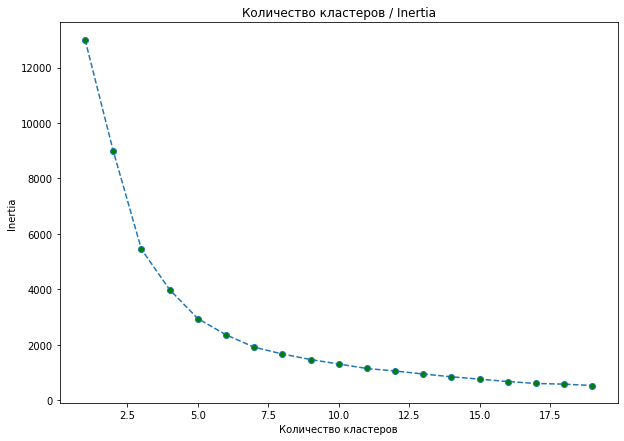

In [ ]:
inertia_list = [] 

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_model[['Recency','Frequency','Monetary']])
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(1,20),inertia_list,marker='o',markerfacecolor='green',linestyle='dashed')
plt.title('Количество кластеров / Inertia')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')

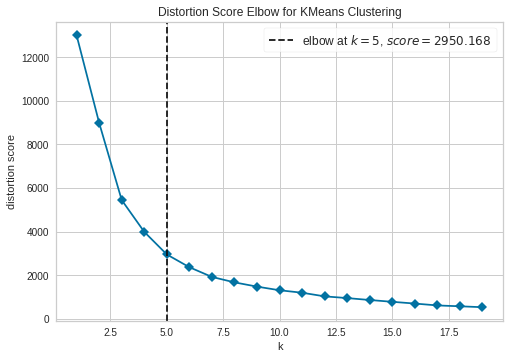

Оптимальное количество кластеров: 5


In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans(random_state=42)
elb_visualizer = KElbowVisualizer(model, k=(1,20), timings=False)
elb_visualizer.fit(rfm_model[['Recency','Frequency','Monetary']])    
elb_visualizer.show()
print(f"Оптимальное количество кластеров: {elb_visualizer.elbow_value_}") 

Визуализируем кластеры на графиках (количество 3, 4, 5)

<Figure size 720x504 with 0 Axes>

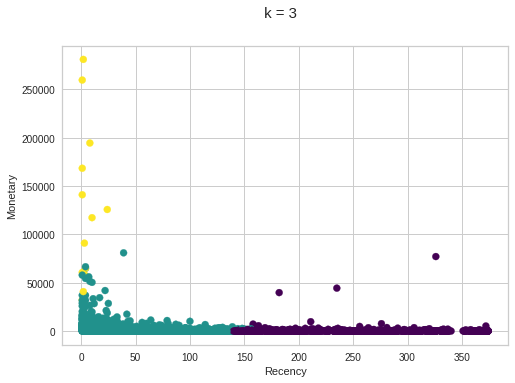

<Figure size 720x504 with 0 Axes>

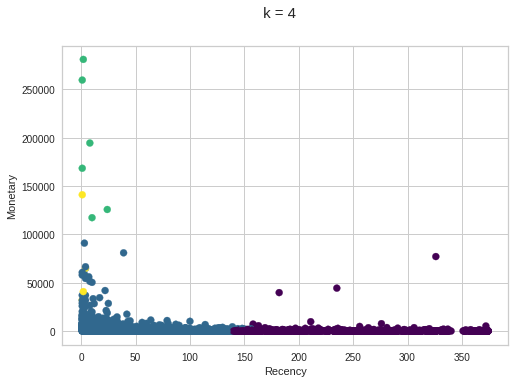

<Figure size 720x504 with 0 Axes>

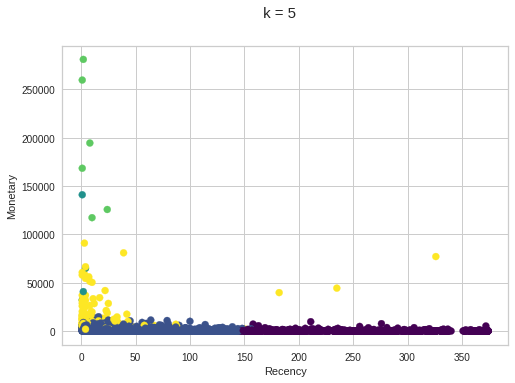

In [ ]:
for k in range(3, 6):
  
  f = plt.figure(figsize=(10,7))
  f, ax = plt.subplots()

  km = KMeans(n_clusters=k)
  labels = km.fit_predict(rfm_model[['Recency','Frequency','Monetary']])
  centroids = km.cluster_centers_

  ax.scatter(rfm['Recency'], rfm['Monetary'], c=labels, cmap='viridis')
  #ax.scatter(centroids[:,0],centroids[:,1],c='green', marker='*',s=300)
  ax.set_xlabel('Recency')
  ax.set_ylabel('Monetary')
  plt.suptitle(' k = {}'.format(k),fontsize=15)
  plt.show()

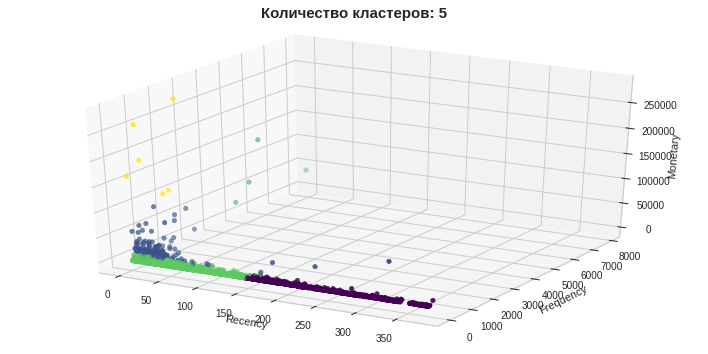

In [ ]:
km = KMeans(n_clusters=5)
labels = km.fit_predict(rfm_model[['Recency','Frequency','Monetary']])
centroids = km.cluster_centers_
df_Kmeans = rfm[['Recency','Frequency','Monetary']]

from mpl_toolkits import mplot3d
plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')
ax.scatter(df_Kmeans['Recency'], df_Kmeans['Frequency'], df_Kmeans['Monetary'], c=labels, 
           cmap='viridis', linewidth=0.5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.suptitle('Количество кластеров: 5',fontsize=15,fontweight='semibold')
plt.legend()
plt.tight_layout()

In [ ]:
df_Kmeans['Кластер/Количество'] = labels

df_Kmeans.groupby(['Кластер/Количество']).agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : 'mean',
    'Кластер/Количество' : 'count'
})


,Recency,Frequency,Monetary,Кластер/Количество
Кластер/Количество,,,,
0,249.608696,27.901701,491.971674,1058
1,15.884000,480.368000,11569.343324,250
2,2.000000,5801.250000,69882.812500,4
3,44.289264,72.846256,1333.297672,3018
4,7.666667,827.833333,191147.581667,6


Сегментируем полученные кластеры на основании параметров RFM:

**Описание и обоснование сегментации**

Обозначим параметры Recency, Frequency и Monetary как: R, F и M

Кластер 0: имеет низкий параметр R и умеренно высокие в отношение других групп показатели F и M. Таких клиентов можно отнести к динамично растущим покупателям, имеющим высокую лояльность. Навязчиво проводить рассылку не имеет большого смысла, но можно оповещать о крупных распродажах и активно мотивировать к покупкам, предлагая сопутствующие товары. Обозначим их "Loyal" (Лояльные)




Кластер 1: имеет наименьший из групп клиентов параметры F и M и самый высокий параметр R, это означает, что такие клиенты покупали давно, мало и на меньшую стоимость. Отнесём их к группе потерянных или же спящих клиентов. Их можно вернуть, используя рассылку, выгодную систему бонусов и иные выгоды. Обозначим их "Sleeping" (Спящие)

Кластер 2: данная группа покупателей имеет относительно низкий показатель R и низкий показатель M, но отталкиваясь от более высокого показателя F, в отличии от 1 кластера, можно предположить, что данная группа покупателей склонна покупать товары чаще на меньшую сумму и таких покупателей большинство. Можно отнести эту группу к новым покупателям. Чтобы вовлечь их в лояльную группу можно прибегнуть к рассылке промокодов на седеющие покупки, а также оповещать о промоакциях и новых распродажах. Обозначим их "New & require attention" (Новые и требуют внимания)

Кластер 3: Данная немногочисленная группа покупателей имеет низкий показатель R и высокие показатели F и M. Клиенты из этой группы покупают крайне часто и приносят наибольшую прибыль. Активно мотивировать их рассылкой о специальных предложениях и скидочных акциях мало эффективно. По показателю F и M, можно предположить, что данные клиенты покупают дорогие товары, но не так часто, как покупатели из группы клиентов кластера 4. Таких клиентов можно привлечь особыми предложениями и высоким скидочным статусом программы лояльности, если такая имеется, дабы удержать их намного дольше. Обозначим их Звёзды ("Star")

Кластер 4: Самая малочисленная группа клиентов, которые покупают крайне часто и совершали свои покупки совсем недавно. По прибыли это вторая по значению группа покупателей. К ним также можно применить подход особого статуса программы лояльности. Исходя из частоты покупок можно предположить, что эти клиенты покупают не самые дорогие товары оптово. Это самая ценная группа клиентов, к ним можно применить индивидуальный подход. Проводить личные консультации и личные оповещения о поступлении новых товаров и готовящихся акциях. Обозначим их Идеальные ("Ideal")

In [ ]:
def apply_segments(x):
    if x['Labels'] == 0 :
        return 'Loyal'
    elif x['Labels'] == 1 :
        return 'Sleeping'
    elif x['Labels'] == 2 :
        return 'New & require attention'
    elif x['Labels'] == 3 :
        return 'Star'        
    else :
        return 'Ideal'

In [ ]:
# Добавим столбец с названиями сегментов и выведем результаты по средним значениям RFM
df_Kmeans['CustSegment'] = df_Kmeans.apply(apply_segments,axis=1)

df_Kmeans.groupby(['CustSegment']).agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : 'mean',
    'Labels' : 'count'
})

,Recency,Frequency,Monetary,Labels
CustSegment,,,,
Ideal,15.809322,490.148305,12014.918225,236
Loyal,44.163918,73.966689,1345.879783,3032
New & require attention,2.000000,5801.250000,69882.812500,4
Sleeping,249.608696,27.901701,491.971674,1058
Star,7.666667,827.833333,191147.581667,6


In [ ]:
df_Kmeans.to_csv('Data_clustered_by_KMeans.csv')

In [ ]:
from sklearn.cluster import DBSCAN

Text(0.5, 0.98, 'Количество кластеров: 3')

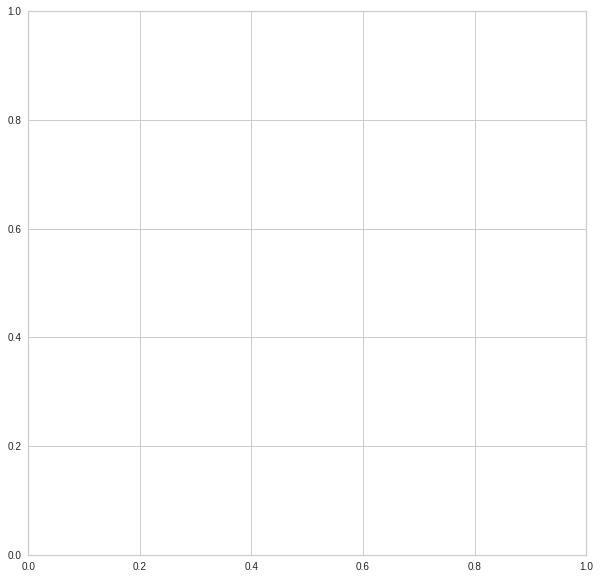

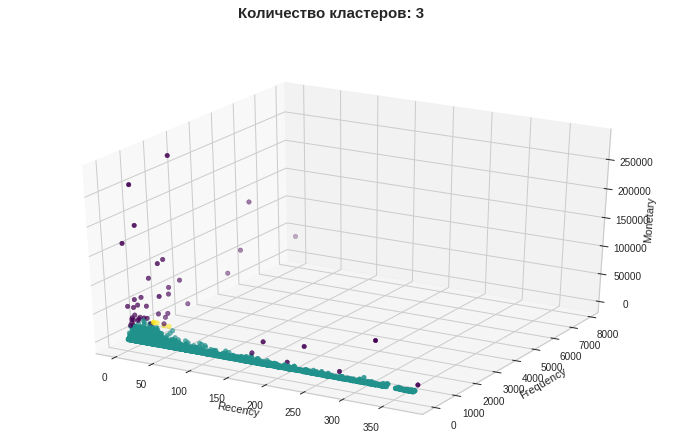

In [ ]:
fig, ax = plt.subplots(figsize=[10, 10])

#стандантизируем и масштабируем данные
dbscan_model = rfm[['Recency','Frequency','Monetary']]
standar = StandardScaler()
standar.fit(dbscan_model)
dbscan_model = standar.transform(dbscan_model)
dbscan_model = pd.DataFrame(dbscan_model, columns=['Recency','Frequency','Monetary'])
dbscan_model['CustomerId'] = rfm.index

db = DBSCAN()
labels = db.fit_predict(dbscan_model[['Recency','Frequency','Monetary']])

'''ax.scatter(rfm['Recency'], rfm['Monetary'], c=labels, cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
plt.show()'''

df_DBSCAN = rfm[['Recency','Frequency','Monetary']]
plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d')
ax.scatter(df_DBSCAN['Recency'], df_DBSCAN['Frequency'], df_DBSCAN['Monetary'], c=labels, 
           cmap='viridis', linewidth=0.5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.suptitle(f'Количество кластеров: {len(np.unique(labels))}',fontsize=15,fontweight='semibold')

In [ ]:
df_DBSCAN = rfm[['Recency','Frequency','Monetary']]
df_DBSCAN['Кластер/Количество'] = labels

df_DBSCAN.groupby(['Кластер/Количество']).agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : 'mean',
    'Кластер/Количество' : 'count'
})

,Recency,Frequency,Monetary,Кластер/Количество
Кластер/Количество,,,,
-1,44.065217,1078.717391,60719.576087,46
0,93.301120,79.649860,1406.003708,4284
1,7.833333,1132.166667,7788.431667,6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
4.406605106437858


<Figure size 360x360 with 0 Axes>

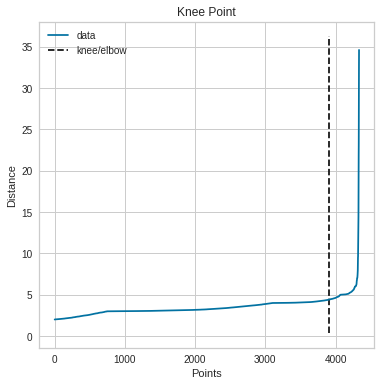

In [ ]:
!pip install kneed
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(dbscan_model)

distances, indices = neighbors.kneighbors(dbscan_model)
distances = np.sort(distances[:,4], axis=0)

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])